In [1]:
get_ipython().run_cell_magic('capture', '', "%logstop\n%logstart -t -r -q ipython_command_log.py global\n\n#- IRONHACKS RESEARCH TRACKING CODE\n#----------------------------------\n# The following code is used to help our research team understand how you \n# our notebook environment. We do not collect any personal information with\n# the following code, it is used to measure when and how often you work on\n# your submission files.\n\nimport os\nfrom datetime import datetime\nimport IPython.core.history as history\n\nha = history.HistoryAccessor()\nha_tail = ha.get_tail(1)\nha_cmd = next(ha_tail)\nsession_id = str(ha_cmd[0])\ncommand_id = str(ha_cmd[1])\ntimestamp = datetime.utcnow().isoformat()\nhistory_line = ','.join([session_id, command_id, timestamp]) + '\\n'\nlogfile = open(os.environ['HOME']+'/ipython_session_log.csv', 'a')\nlogfile.write(history_line)\nlogfile.close()\n")

SUBMISSION 11 Milestone
The task was to predict the total_claims for week 42
For each week there is a distinct list of uu_ids with unique uu_id in the table called prediction_list
Predict a value for each of those uu_ids
The list is changing over time (given the streaming nature of the data)

In [2]:
get_ipython().run_cell_magic('capture', '', "\n# INSTALL ADDITIONAL LIBRARIES IF REQUIRED\n# ------------------------------------------\n# This is normally not required. The hub environment comes preinstaled with \n# many packages that you can already use without setup. In case there is some\n# other library you would like to use that isn't on the list you run this command\n# once to install them.  If it is already installed this command has no effect.\n\n!python3 -m pip install pandas\n!python3 -m pip install [ensorflow]\n!python3 -m pip install [Keras]\n!python3 -m pip install [Pytorch]\n")

INSTALL PACKAGES

In [3]:
get_ipython().system('pip install db-dtypes')

IMPORT THE LIBRARIES YOU WILL USE
------------------------------------------
You only need to import packages one time per notebook session. To keep your
notebook clean and organized you can handle all imports at the top of your file.
The following are included for example purposed, feel free to modify or delete 
anything in this section.

In [1]:
import csv
import pandas as pd
import numpy as np
from google.cloud import bigquery
from google.oauth2 import service_account
from google.cloud.bigquery import magics
import statsmodels.api as sm
import math

IMPORT THE DATASET

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
get_ipython().run_line_magic('matplotlib', 'inline')

In [3]:
import os
from google.cloud import bigquery
from google.oauth2 import service_account
from google.cloud.bigquery import magics

IMPORT IRONHACKS DATA

In [4]:
import os
BIGQUERY_PROJECT = 'ironhacks-data'

In [5]:
bigquery.Client(project=BIGQUERY_PROJECT)

IMPORT THE LINEAR REGRESSION MODEL

In [6]:
import csv
import pandas as pd
import numpy as np
from google.cloud import bigquery
from google.oauth2 import service_account
from google.cloud.bigquery import magics
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import matplotlib.pyplot as plt  

IMPORT PACKAGE THE LINEAR REGRESSION MODEL- SCIKIT-LEARN 
SOURCE: https://realpython.com/linear-regression-in-python/#simple-linear-regression-with-scikit-learn
NUMPY IS A FUNDAMENTAL PUYTHON SCIENTIFIC PACKAGE THAT ALLOWS MANY HIGH PEROFORMATION OPERATION SON A SINGLE AND MULTI DIMENSIONAL ARRAYS.
SOURCE: https://realpython.com/linear-regression-in-python/#python-packages-for-linear-regression

In [7]:
import numpy as np
from sklearn.linear_model import LinearRegression

In [8]:
# DEFINING THE DATA; INPUTS (REGRESSOR.X) AND OUTPUTS (RESPONSE.Y)
x = np.array([5, 15, 25, 35, 45, 55]).reshape((-1, 1))
y = np.array([5, 20, 14, 32, 22, 38])

DEFINE YOUR CLASSES AND FUNCTIONS 
-----------------------------------
This is not required, but is helpful in keeping your notebook organized. 
You can use the following cell or several cells to define your functions
and classes to keep them separate from your analysis or results code.
In general it useful to define your methods in a separate cell from where
it is run.

In [9]:
def example_function():
    print('Hello World')

In [10]:
# CREATE A LINEAR REGRESSION MODEL
model = LinearRegression()

In [11]:
# START USING A MODEL - .fit() fits the model
# SOURCE: REAL PYTHON - https://realpython.com/linear-regression-in-python/#simple-linear-regression-with-scikit-learn
model.fit(x,y)
LinearRegression

sklearn.linear_model._base.LinearRegression

In [12]:
# START USING A MODEL - Same statement written differently
model = LinearRegression().fit(x,y)

In [13]:
# GET RESULTS - NOW THAT THE MODEL HAS BEEN FITTED; LET SEE IF IT WORKS!
r_sq = model.score(x, y)
print(f"coefficient of determination: {r_sq}")

coefficient of determination: 0.7158756137479542


THE RETURN VALUE SHOULD BE R2

DETERMIINE HOW TO GET b0 and b1 (scikit-learn)
intercept and coefficient are estimated values

In [14]:
new_model = LinearRegression().fit(x,y.reshape((-1,1)))
print(f"intercept: {new_model.intercept_}")

intercept: [5.63333333]


In [15]:
# DETERMIINE HOW TO GET b0 and b1 (scikit-learn)
# intercept and coefficient are estimated values
print(f"slope: {new_model.coef_}")

slope: [[0.54]]


In [16]:
# NOW THAT WE KNOW OUR MODEL IS WORKING; LET'S PREDICT A RESPONSE!
y_pred = model.predict(x)
print(f"predicted response:\n{y_pred}")

predicted response:
[ 8.33333333 13.73333333 19.13333333 24.53333333 29.93333333 35.33333333]


HERE'S ANOTHER WAY TO PREDICT THE RESPONSE
THIS IS WERE EACH ELEMENT OF X WERE MULTIPLIED BY WITH THE MODEL COEFFICIENT

In [17]:
y_pred = model.intercept_ + model.coef_ * x
print(f"predicted response:\n{y_pred}")

predicted response:
[[ 8.33333333]
 [13.73333333]
 [19.13333333]
 [24.53333333]
 [29.93333333]
 [35.33333333]]


REGRESSION MODELS ARE TYPCIALLY USED FOR FORECASTS
FITTED MODELS CAN BE USED TO CALCULATE THE OUTPUTS

In [18]:
x_new = np.arange(5). reshape((-1, 1))
x_new

array([[0],
       [1],
       [2],
       [3],
       [4]])

In [19]:
# REGRESSION MODELS ARE TYPCIALLY USED FOR FORECASTS
# FITTED MODELS CAN BE USED TO CALCULATE THE OUTPUTS
y_new = model.predict(x_new)
y_new

array([5.63333333, 6.17333333, 6.71333333, 7.25333333, 7.79333333])

Obtain data using BigQuery

In [20]:
BIGQUERY_PROJECT = 'ironhacks-data'
bigquery_client = bigquery.Client(project=BIGQUERY_PROJECT)

In [21]:
query = """
SELECT
x.*,
y.average_wage
FROM
(SELECT
*
FROM `ironhacks-data.ironhacks_competition.unemployment_data`) x
JOIN `ironhacks-data.ironhacks_competition.wage_data` y
ON x.uu_id = y.uu_id
"""

In [22]:
query_job = bigquery_client.query(query)
data = query_job.to_dataframe()

In [23]:
query_pred = """
SELECT * FROM `ironhacks-data.ironhacks_competition.prediction_list`
"""

In [24]:
query_job_pred = bigquery_client.query(query_pred)
data_pred_query= query_job_pred.to_dataframe()

In [25]:
# START USING A MODEL - Same statement written differently
model = LinearRegression().fit(x,y)

In [26]:
# GET RESULTS - NOW THAT THE MODEL HAS BEEN FITTED; LET SEE IF IT WORKS!
r_sq = model.score(x, y)
print(f"coefficient of determination: {r_sq}")

coefficient of determination: 0.7158756137479542


THE RETURN VALUE SHOULD BE R2

In [27]:
# Linear Regression
model.fit(x, y)
LinearRegression()

LinearRegression()

In [28]:
# Test Linear Regression
model = LinearRegression().fit(x, y)

In [29]:
# Test Linear Regression
r_sq = model.score(x, y)
print(f"coefficient of determination: {r_sq}")

coefficient of determination: 0.7158756137479542


In [30]:
# Test Linear Regression
print(f"predicted response:\n{y_pred}")

predicted response:
[[ 8.33333333]
 [13.73333333]
 [19.13333333]
 [24.53333333]
 [29.93333333]
 [35.33333333]]


In [31]:
# Test Linear Regression
new_model = LinearRegression().fit(x, y.reshape((-1, 1)))
print(f"intercept: {new_model.intercept_}")

intercept: [5.63333333]


In [32]:
print(f"slope: {new_model.coef_}")

slope: [[0.54]]


In [33]:
# Test Linear Regression
x_new = np.arange(5).reshape((-1, 1))
x_new

array([[0],
       [1],
       [2],
       [3],
       [4]])

In [34]:
# Test Linear Regression
x

array([[ 5],
       [15],
       [25],
       [35],
       [45],
       [55]])

In [35]:
# Test Linear Regression
y

array([ 5, 20, 14, 32, 22, 38])

In [36]:
# Test Linear Regression
model = LinearRegression().fit(x, y)

In [37]:
# Test Linear Regression
model = sm.OLS(y, x)

In [38]:
# Test Linear Regression
results = model.fit()

In [39]:
# Test Linear Regression
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.930
Model:                            OLS   Adj. R-squared (uncentered):              0.916
Method:                 Least Squares   F-statistic:                              66.71
Date:                Fri, 21 Apr 2023   Prob (F-statistic):                    0.000447
Time:                        18:18:32   Log-Likelihood:                         -19.692
No. Observations:                   6   AIC:                                      41.38
Df Residuals:                       5   BIC:                                      41.18
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


VISUALIZE THE RESULTS
CREDIT: ASK PYTHON
PLOT GRAPHS USING MATPLOTLIB
PLOT for the TRAIN

In [40]:
def plot_regression
plt.scatter(X_train, y_train, color='red') #plotting the observation line

SyntaxError: invalid syntax (533664152.py, line 1)

In [41]:
plt.plot(X_train, regressor.predict(X_train), color='blue') #plotting the regression line

NameError: name 'X_train' is not defined

In [42]:
plt.title('Week_number') vs ("uu_Id"(Training Set)) 
# stating the title of the graph

SyntaxError: invalid syntax (2093449847.py, line 1)

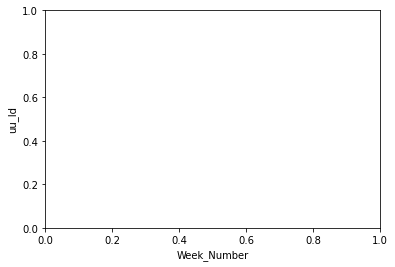

In [43]:
plt.xlabel('Week_Number') #adding the name of x-axis
plt.ylabel('uu_Id') #adding the name of y-axis
plt.show() #specifies end of graph

Build a linear model

In [44]:
def plot_regression(d):    
    e = d.loc[:, COL_MAP['edu'] + ['total_claims']].reset_index(0, drop=True)
    e = e.fillna(0)
    X = e[COL_MAP['edu']]
    y = e['total_claims']
    model = sklearn.linear_model.LinearRegression()
    model.fit(X, y)
    fig, ax = plt.subplots()
    ax.plot(X.index, model.predict(X), label='predict')
    ax.plot(X.index, y, label='observed', ls='--')
    ax.legend()
    ax.set_xlabel('index')
    ax.set_ylabel('total_claims')

In [45]:
plot_regression(d)

NameError: name 'd' is not defined

Build a linear model

In [46]:
def load_imp_industry(csv_name='4_imp_industry.csv'):
    if not os.path.isfile(csv_name):
        d = load_clean()
        d = d.groupby('uu_id').apply(impute_industry).reset_index(0, drop=True)
        d.to_csv(csv_name, index=False)
    else:
        d = pd.read_csv(csv_name)
    return d

In [47]:
d = load_imp_industry()
d
def plot_regression(d):    
    e = d.loc[:, COL_MAP['edu'] + ['total_claims']].reset_index(0, drop=True)
    e = e.fillna(0)
    X = e[COL_MAP['edu']]
    y = e['total_claims']
    model = sklearn.linear_model.LinearRegression()
    model.fit(X, y)
    fig, ax = plt.subplots()
    ax.plot(X.index, model.predict(X), label='predict')
    ax.plot(X.index, y, label='observed', ls='--')
    ax.legend()
    ax.set_xlabel('index')
    ax.set_ylabel('total_claims')

NameError: name 'load_clean' is not defined

In [48]:
plot_regression(d)

NameError: name 'd' is not defined

Build a linear model

In [50]:
sklearn.linear_model.LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=10000).fit(x_train, y_train.values.ravel())
        yhat = model.predict(x_test)
    g.loc[~mask_train, ycols] = yhat
    return g[ycol]

IndentationError: unindent does not match any outer indentation level (<tokenize>, line 3)

In [51]:
def impute_industry(g, max_week_number=37):
    g = g.loc[g.week_number <= max_week_number, :]
    x = g.copy()
    for colname in COL_MAP['industry']:
        x[colname] = impute_logistic(g, colname)
    return x

In [52]:
def load_imp_industry(csv_name='4_imp_industry.csv'):
    if not os.path.isfile(csv_name):
        d = load_clean()
        d = d.groupby('uu_id').apply(impute_industry).reset_index(0, drop=True)
        d.to_csv(csv_name, index=False)
    else:
        d = pd.read_csv(csv_name)
    return d

In [53]:
d = load_imp_industry()
d
def plot_regression(d):    
    e = d.loc[:, COL_MAP['edu'] + ['total_claims']].reset_index(0, drop=True)
    e = e.fillna(0)
    X = e[COL_MAP['edu']]
    y = e['total_claims']
    model = sklearn.linear_model.LinearRegression()
    model.fit(X, y)
    fig, ax = plt.subplots()
    ax.plot(X.index, model.predict(X), label='predict')
    ax.plot(X.index, y, label='observed', ls='--')
    ax.legend()
    ax.set_xlabel('index')
    ax.set_ylabel('total_claims')

NameError: name 'load_clean' is not defined

In [54]:
plot_regression(d)

NameError: name 'd' is not defined

Build a linear model

In [55]:
def impute_logistic(g, ycol):
    g = g[[ycol, 'week_number', 'total_claims']]
    xcols = ['week_number', 'total_claims']
    ycols = [ycol]
    
    mask_train = ~g[ycol].isnull()
    x_train, x_test = g.loc[mask_train, xcols], g.loc[~mask_train, xcols]
    y_train, y_test = g.loc[mask_train, ycols], g.loc[~mask_train, ycols]
    
    if y_train.shape[0] == 0:
        g[ycol] = None
        return g[ycol]
    
    classes = y_train[ycol].unique()
    if len(classes) == 1:
        yhat = [classes[0]]
    else:
        model = 
        sklearn.linear_model.LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=10000).fit(x_train, y_train.values.ravel())
        yhat = model.predict(x_test)
    g.loc[~mask_train, ycols] = yhat
    return g[ycol]

SyntaxError: invalid syntax (2105669826.py, line 18)

In [56]:
def impute_industry(g, max_week_number=37):
    g = g.loc[g.week_number <= max_week_number, :]
    x = g.copy()
    for colname in COL_MAP['industry']:
        x[colname] = impute_logistic(g, colname)
    return x

In [57]:
def load_imp_industry(csv_name='4_imp_industry.csv'):
    if not os.path.isfile(csv_name):
        d = load_clean()
        d = d.groupby('uu_id').apply(impute_industry).reset_index(0, drop=True)
        d.to_csv(csv_name, index=False)
    else:
        d = pd.read_csv(csv_name)
    return d

In [58]:
d = load_imp_industry()
d
def plot_regression(d):    
    e = d.loc[:, COL_MAP['edu'] + ['total_claims']].reset_index(0, drop=True)
    e = e.fillna(0)
    X = e[COL_MAP['edu']]
    y = e['total_claims']
    model = sklearn.linear_model.LinearRegression()
    model.fit(X, y)
    fig, ax = plt.subplots()
    ax.plot(X.index, model.predict(X), label='predict')
    ax.plot(X.index, y, label='observed', ls='--')
    ax.legend()
    ax.set_xlabel('index')
    ax.set_ylabel('total_claims')

NameError: name 'load_clean' is not defined

In [59]:
plot_regression(d)

NameError: name 'd' is not defined

In [60]:
# Importing necessary libraries
import numpy as np
import pandas as pd

In [61]:
housing = pd.read_csv("Housing.csv")
housing.head()

FileNotFoundError: [Errno 2] No such file or directory: 'Housing.csv'

Build a linear model

In [62]:
def impute_logistic(g, ycol):
    g = g[[ycol, 'week_number', 'total_claims']]
    xcols = ['week_number', 'total_claims']
    ycols = [ycol]
    
    mask_train = ~g[ycol].isnull()
    x_train, x_test = g.loc[mask_train, xcols], g.loc[~mask_train, xcols]
    y_train, y_test = g.loc[mask_train, ycols], g.loc[~mask_train, ycols]
    
    if y_train.shape[0] == 0:
        g[ycol] = None
        return g[ycol]
    
    classes = y_train[ycol].unique()
    if len(classes) == 1:
        yhat = [classes[0]]
    else:
        model =
        
        sklearn.linear_model.LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=10000).fit(x_train, y_train.values.ravel())
        yhat = model.predict(x_test)
    g.loc[~mask_train, ycols] = yhat
    return g[ycol]

SyntaxError: invalid syntax (4119033176.py, line 18)

In [63]:
def impute_industry(g, max_week_number=37):
    g = g.loc[g.week_number <= max_week_number, :]
    x = g.copy()
    for colname in COL_MAP['industry']:
        x[colname] = impute_logistic(g, colname)
    return x

In [64]:
def load_imp_industry(csv_name='4_imp_industry.csv'):
    if not os.path.isfile(csv_name):
        d = load_clean()
        d = d.groupby('uu_id').apply(impute_industry).reset_index(0, drop=True)
        d.to_csv(csv_name, index=False)
    else:
        d = pd.read_csv(csv_name)
    return d

In [65]:
d = load_imp_industry()
d
def plot_regression(d):    
    e = d.loc[:, COL_MAP['edu'] + ['total_claims']].reset_index(0, drop=True)
    e = e.fillna(0)
    X = e[COL_MAP['edu']]
    y = e['total_claims']
    model = sklearn.linear_model.LinearRegression()
    model.fit(X, y)
    fig, ax = plt.subplots()
    ax.plot(X.index, model.predict(X), label='predict')
    ax.plot(X.index, y, label='observed', ls='--')
    ax.legend()
    ax.set_xlabel('index')
    ax.set_ylabel('total_claims')

NameError: name 'load_clean' is not defined

In [66]:
plot_regression(d)

NameError: name 'd' is not defined

Build a linear model

In [67]:
def impute_logistic(g, ycol):
    g = g[[ycol, 'week_number', 'total_claims']]
    xcols = ['week_number', 'total_claims']
    ycols = [ycol]

In [68]:
mask_train = ~g[ycol].isnull()
    x_train, x_test = g.loc[mask_train, xcols], g.loc[~mask_train, xcols]
    y_train, y_test = g.loc[mask_train, ycols], g.loc[~mask_train, ycols]

IndentationError: unexpected indent (3797937319.py, line 2)

In [69]:
if y_train.shape[0] == 0:
    g[ycol] = None
    return g[ycol]
    
    classes = y_train[ycol].unique()
    if len(classes) == 1:
        yhat = [classes[0]]
    else:
        model =
        
        sklearn.linear_model.LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=10000).fit(x_train, y_train.values.ravel())
        yhat = model.predict(x_test)
    g.loc[~mask_train, ycols] = yhat
    return g[ycol]

SyntaxError: invalid syntax (188009504.py, line 9)

In [70]:
def impute_industry(g, max_week_number=37):
    g = g.loc[g.week_number <= max_week_number, :]
    x = g.copy()
    for colname in COL_MAP['industry']:
        x[colname] = impute_logistic(g, colname)
    return x

In [71]:
def load_imp_industry(csv_name='4_imp_industry.csv'):
    if not os.path.isfile(csv_name):
        d = load_clean()
        d = d.groupby('uu_id').apply(impute_industry).reset_index(0, drop=True)
        d.to_csv(csv_name, index=False)
    else:
        d = pd.read_csv(csv_name)
    return d

In [72]:
d = load_imp_industry()
d
def plot_regression(d):    
    e = d.loc[:, COL_MAP['edu'] + ['total_claims']].reset_index(0, drop=True)
    e = e.fillna(0)
    X = e[COL_MAP['edu']]
    y = e['total_claims']
    model = sklearn.linear_model.LinearRegression()
    model.fit(X, y)
    fig, ax = plt.subplots()
    ax.plot(X.index, model.predict(X), label='predict')
    ax.plot(X.index, y, label='observed', ls='--')
    ax.legend()
    ax.set_xlabel('index')
    ax.set_ylabel('total_claims')

NameError: name 'load_clean' is not defined

In [73]:
plot_regression(d)

NameError: name 'd' is not defined

Build a linear model

In [74]:
def impute_logistic(g, ycol):
    g = g[[ycol, 'week_number', 'total_claims']]
    xcols = ['week_number', 'total_claims']
    ycols = [ycol]

In [75]:
mask_train = ~g[ycol].isnull()
x_train, x_test = g.loc[mask_train, xcols], g.loc[~mask_train, xcols]
y_train, y_test = g.loc[mask_train, ycols], g.loc[~mask_train, ycols]

NameError: name 'g' is not defined

In [76]:
if y_train.shape[0] == 0:
    g[ycol] = None
    return g[ycol]
    
    classes = y_train[ycol].unique()
    if len(classes) == 1:
        yhat = [classes[0]]
    else:
        model =
        
        sklearn.linear_model.LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=10000).fit(x_train, y_train.values.ravel())
        yhat = model.predict(x_test)
    g.loc[~mask_train, ycols] = yhat
    return g[ycol]

SyntaxError: invalid syntax (188009504.py, line 9)

In [77]:
def impute_industry(g, max_week_number=37):
    g = g.loc[g.week_number <= max_week_number, :]
    x = g.copy()
    for colname in COL_MAP['industry']:
        x[colname] = impute_logistic(g, colname)
    return x

In [78]:
def load_imp_industry(csv_name='4_imp_industry.csv'):
    if not os.path.isfile(csv_name):
        d = load_clean()
        d = d.groupby('uu_id').apply(impute_industry).reset_index(0, drop=True)
        d.to_csv(csv_name, index=False)
    else:
        d = pd.read_csv(csv_name)
    return d

In [79]:
d = load_imp_industry()
d
def plot_regression(d):    
    e = d.loc[:, COL_MAP['edu'] + ['total_claims']].reset_index(0, drop=True)
    e = e.fillna(0)
    X = e[COL_MAP['edu']]
    y = e['total_claims']
    model = sklearn.linear_model.LinearRegression()
    model.fit(X, y)
    fig, ax = plt.subplots()
    ax.plot(X.index, model.predict(X), label='predict')
    ax.plot(X.index, y, label='observed', ls='--')
    ax.legend()
    ax.set_xlabel('index')
    ax.set_ylabel('total_claims')

NameError: name 'load_clean' is not defined

In [80]:
plot_regression(d)

NameError: name 'd' is not defined

Build a linear model

In [81]:
def impute_logistic(g, ycol):
    g = g[[ycol, 'week_number', 'total_claims']]
    xcols = ['week_number', 'total_claims']
    ycols = [ycol]

In [82]:
mask_train = ~g[ycol].isnull()
x_train, x_test = g.loc[mask_train, xcols], g.loc[~mask_train, xcols]
y_train, y_test = g.loc[mask_train, ycols], g.loc[~mask_train, ycols]

NameError: name 'g' is not defined

In [83]:
if y_train.shape[0] == 0:
    g[ycol] = None
    return g[ycol]
    
    classes = y_train[ycol].unique()
    if len(classes) == 1:
        yhat = [classes[0]]
else:
    model =
        
        sklearn.linear_model.LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=10000).fit(x_train, y_train.values.ravel())
        yhat = model.predict(x_test)
    g.loc[~mask_train, ycols] = yhat
    return g[ycol]

SyntaxError: invalid syntax (2202387406.py, line 9)

In [84]:
def impute_industry(g, max_week_number=37):
    g = g.loc[g.week_number <= max_week_number, :]
    x = g.copy()
    for colname in COL_MAP['industry']:
        x[colname] = impute_logistic(g, colname)
    return x

In [85]:
def load_imp_industry(csv_name='4_imp_industry.csv'):
    if not os.path.isfile(csv_name):
        d = load_clean()
        d = d.groupby('uu_id').apply(impute_industry).reset_index(0, drop=True)
        d.to_csv(csv_name, index=False)
    else:
        d = pd.read_csv(csv_name)
    return d

In [86]:
d = load_imp_industry()
d
def plot_regression(d):    
    e = d.loc[:, COL_MAP['edu'] + ['total_claims']].reset_index(0, drop=True)
    e = e.fillna(0)
    X = e[COL_MAP['edu']]
    y = e['total_claims']
    model = sklearn.linear_model.LinearRegression()
    model.fit(X, y)
    fig, ax = plt.subplots()
    ax.plot(X.index, model.predict(X), label='predict')
    ax.plot(X.index, y, label='observed', ls='--')
    ax.legend()
    ax.set_xlabel('index')
    ax.set_ylabel('total_claims')

NameError: name 'load_clean' is not defined

In [87]:
plot_regression(d)

NameError: name 'd' is not defined

Build a linear model

In [88]:
def impute_logistic(g, ycol):
    g = g[[ycol, 'week_number', 'total_claims']]
    xcols = ['week_number', 'total_claims']
    ycols = [ycol]

In [89]:
mask_train = ~g[ycol].isnull()
x_train, x_test = g.loc[mask_train, xcols], g.loc[~mask_train, xcols]
y_train, y_test = g.loc[mask_train, ycols], g.loc[~mask_train, ycols]

NameError: name 'g' is not defined

In [90]:
if y_train.shape[0] == 0:
    g[ycol] = None
    return g[ycol]
    
    classes = y_train[ycol].unique()
    if len(classes) == 1:
        yhat = [classes[0]]
else:
    model =
        sklearn.linear_model.LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=10000).fit(x_train, y_train.values.ravel())
        yhat = model.predict(x_test)
    g.loc[~mask_train, ycols] = yhat
    return g[ycol]

SyntaxError: invalid syntax (664185722.py, line 9)

In [91]:
def impute_industry(g, max_week_number=37):
    g = g.loc[g.week_number <= max_week_number, :]
    x = g.copy()
    for colname in COL_MAP['industry']:
        x[colname] = impute_logistic(g, colname)
    return x

In [92]:
def load_imp_industry(csv_name='4_imp_industry.csv'):
    if not os.path.isfile(csv_name):
        d = load_clean()
        d = d.groupby('uu_id').apply(impute_industry).reset_index(0, drop=True)
        d.to_csv(csv_name, index=False)
    else:
        d = pd.read_csv(csv_name)
    return d

In [93]:
d = load_imp_industry()
d
def plot_regression(d):    
    e = d.loc[:, COL_MAP['edu'] + ['total_claims']].reset_index(0, drop=True)
    e = e.fillna(0)
    X = e[COL_MAP['edu']]
    y = e['total_claims']
    model = sklearn.linear_model.LinearRegression()
    model.fit(X, y)
    fig, ax = plt.subplots()
    ax.plot(X.index, model.predict(X), label='predict')
    ax.plot(X.index, y, label='observed', ls='--')
    ax.legend()
    ax.set_xlabel('index')
    ax.set_ylabel('total_claims')

NameError: name 'load_clean' is not defined

In [94]:
plot_regression(d)

NameError: name 'd' is not defined

Build a linear model

In [95]:
def impute_logistic(g, ycol):
    g = g[[ycol, 'week_number', 'total_claims']]
    xcols = ['week_number', 'total_claims']
    ycols = [ycol]

In [96]:
mask_train = ~g[ycol].isnull()
x_train, x_test = g.loc[mask_train, xcols], g.loc[~mask_train, xcols]
y_train, y_test = g.loc[mask_train, ycols], g.loc[~mask_train, ycols]

NameError: name 'g' is not defined

In [98]:
if y_train.shape[0] == 0:
    g[ycol] = None
    return g[ycol]
    
    classes = y_train[ycol].unique()
    if len(classes) == 1:
        yhat = [classes[0]]
else:
    model =
sklearn.linear_model.LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=10000).fit(x_train, y_train.values.ravel())
        yhat = model.predict(x_test)
    g.loc[~mask_train, ycols] = yhat
    return g[ycol]

IndentationError: unindent does not match any outer indentation level (<tokenize>, line 12)

In [99]:
def impute_industry(g, max_week_number=37):
    g = g.loc[g.week_number <= max_week_number, :]
    x = g.copy()
    for colname in COL_MAP['industry']:
        x[colname] = impute_logistic(g, colname)
    return x

In [100]:
def load_imp_industry(csv_name='4_imp_industry.csv'):
    if not os.path.isfile(csv_name):
        d = load_clean()
        d = d.groupby('uu_id').apply(impute_industry).reset_index(0, drop=True)
        d.to_csv(csv_name, index=False)
    else:
        d = pd.read_csv(csv_name)
    return d

In [101]:
d = load_imp_industry()
d
def plot_regression(d):    
    e = d.loc[:, COL_MAP['edu'] + ['total_claims']].reset_index(0, drop=True)
    e = e.fillna(0)
    X = e[COL_MAP['edu']]
    y = e['total_claims']
    model = sklearn.linear_model.LinearRegression()
    model.fit(X, y)
    fig, ax = plt.subplots()
    ax.plot(X.index, model.predict(X), label='predict')
    ax.plot(X.index, y, label='observed', ls='--')
    ax.legend()
    ax.set_xlabel('index')
    ax.set_ylabel('total_claims')

NameError: name 'load_clean' is not defined

In [102]:
plot_regression(d)

NameError: name 'd' is not defined

Build a linear model

In [103]:
def impute_logistic(g, ycol):
    g = g[[ycol, 'week_number', 'total_claims']]
    xcols = ['week_number', 'total_claims']
    ycols = [ycol]

In [104]:
mask_train = ~g[ycol].isnull()
x_train, x_test = g.loc[mask_train, xcols], g.loc[~mask_train, xcols]
y_train, y_test = g.loc[mask_train, ycols], g.loc[~mask_train, ycols]

NameError: name 'g' is not defined

In [105]:
if y_train.shape[0] == 0:
    g[ycol] = None
    return g[ycol]

SyntaxError: 'return' outside function (1746719097.py, line 3)

In [107]:
classes = y_train[ycol].unique()
if len(classes) == 1:
        yhat = [classes[0]]
else:
    model =
sklearn.linear_model.LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=10000).fit(x_train, y_train.values.ravel())
        yhat = model.predict(x_test)
    g.loc[~mask_train, ycols] = yhat
    return g[ycol]

IndentationError: unindent does not match any outer indentation level (<tokenize>, line 8)

In [108]:
def impute_industry(g, max_week_number=37):
    g = g.loc[g.week_number <= max_week_number, :]
    x = g.copy()
    for colname in COL_MAP['industry']:
        x[colname] = impute_logistic(g, colname)
    return x

In [109]:
def load_imp_industry(csv_name='4_imp_industry.csv'):
    if not os.path.isfile(csv_name):
        d = load_clean()
        d = d.groupby('uu_id').apply(impute_industry).reset_index(0, drop=True)
        d.to_csv(csv_name, index=False)
    else:
        d = pd.read_csv(csv_name)
    return d

In [110]:
d = load_imp_industry()
d
def plot_regression(d):    
    e = d.loc[:, COL_MAP['edu'] + ['total_claims']].reset_index(0, drop=True)
    e = e.fillna(0)
    X = e[COL_MAP['edu']]
    y = e['total_claims']
    model = sklearn.linear_model.LinearRegression()
    model.fit(X, y)
    fig, ax = plt.subplots()
    ax.plot(X.index, model.predict(X), label='predict')
    ax.plot(X.index, y, label='observed', ls='--')
    ax.legend()
    ax.set_xlabel('index')
    ax.set_ylabel('total_claims')

NameError: name 'load_clean' is not defined

In [111]:
plot_regression(d)

NameError: name 'd' is not defined

Build a linear model

In [112]:
def impute_logistic(g, ycol):
    g = g[[ycol, 'week_number', 'total_claims']]
    xcols = ['week_number', 'total_claims']
    ycols = [ycol]

In [113]:
mask_train = ~g[ycol].isnull()
    x_train, x_test = g.loc[mask_train, xcols], g.loc[~mask_train, xcols]
    y_train, y_test = g.loc[mask_train, ycols], g.loc[~mask_train, ycols]

IndentationError: unexpected indent (3797937319.py, line 2)

In [115]:
if y_train.shape[0] == 0:
    g[ycol] = None
return g[ycol]
    
    classes = y_train[ycol].unique()
if len(classes) == 1:
        yhat = [classes[0]]
else:
    model =
sklearn.linear_model.LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=10000).fit(x_train, y_train.values.ravel())
        yhat = model.predict(x_test)
    g.loc[~mask_train, ycols] = yhat
return g[ycol]

IndentationError: unindent does not match any outer indentation level (<tokenize>, line 12)

In [116]:
def impute_industry(g, max_week_number=37):
    g = g.loc[g.week_number <= max_week_number, :]
    x = g.copy()
    for colname in COL_MAP['industry']:
        x[colname] = impute_logistic(g, colname)
    return x

In [117]:
def load_imp_industry(csv_name='4_imp_industry.csv'):
    if not os.path.isfile(csv_name):
        d = load_clean()
        d = d.groupby('uu_id').apply(impute_industry).reset_index(0, drop=True)
        d.to_csv(csv_name, index=False)
    else:
        d = pd.read_csv(csv_name)
    return d

In [118]:
d = load_imp_industry()
d
def plot_regression(d):    
    e = d.loc[:, COL_MAP['edu'] + ['total_claims']].reset_index(0, drop=True)
    e = e.fillna(0)
    X = e[COL_MAP['edu']]
    y = e['total_claims']
    model = sklearn.linear_model.LinearRegression()
    model.fit(X, y)
    fig, ax = plt.subplots()
    ax.plot(X.index, model.predict(X), label='predict')
    ax.plot(X.index, y, label='observed', ls='--')
    ax.legend()
    ax.set_xlabel('index')
    ax.set_ylabel('total_claims')

NameError: name 'load_clean' is not defined

In [119]:
plot_regression(d)

NameError: name 'd' is not defined

Build a linear model

In [120]:
def impute_logistic(g, ycol):
    g = g[[ycol, 'week_number', 'total_claims']]
    xcols = ['week_number', 'total_claims']
    ycols = [ycol]

In [121]:
mask_train = ~g[ycol].isnull()
    x_train, x_test = g.loc[mask_train, xcols], g.loc[~mask_train, xcols]
    y_train, y_test = g.loc[mask_train, ycols], g.loc[~mask_train, ycols]

IndentationError: unexpected indent (3797937319.py, line 2)

In [123]:
if y_train.shape[0] == 0:
    g[ycol] = None
return g[ycol]
    
    classes = y_train[ycol].unique()
if len(classes) == 1:
        yhat = [classes[0]]
else:
    model =
sklearn.linear_model.LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=10000).fit(x_train, y_train.values.ravel())
        yhat = model.predict(x_test)
    g.loc[~mask_train, ycols] = yhat
return g[ycol]

IndentationError: unindent does not match any outer indentation level (<tokenize>, line 12)

In [124]:
def impute_industry(g, max_week_number=37):
    g = g.loc[g.week_number <= max_week_number, :]
    x = g.copy()
    for colname in COL_MAP['industry']:
        x[colname] = impute_logistic(g, colname)
    return x

In [125]:
def load_imp_industry(csv_name='4_imp_industry.csv'):
    if not os.path.isfile(csv_name):
        d = load_clean()
        d = d.groupby('uu_id').apply(impute_industry).reset_index(0, drop=True)
        d.to_csv(csv_name, index=False)
    else:
        d = pd.read_csv(csv_name)
    return d

In [126]:
d = load_imp_industry()
d

NameError: name 'load_clean' is not defined

In [127]:
def plot_regression(d):    
    e = d.loc[:, COL_MAP['edu'] + ['total_claims']].reset_index(0, drop=True)
    e = e.fillna(0)
    X = e[COL_MAP['edu']]
    y = e['total_claims']
    model = sklearn.linear_model.LinearRegression()
    model.fit(X, y)
    fig, ax = plt.subplots()
    ax.plot(X.index, model.predict(X), label='predict')
    ax.plot(X.index, y, label='observed', ls='--')
    ax.legend()
    ax.set_xlabel('index')
    ax.set_ylabel('total_claims')

In [128]:
plot_regression(d)

NameError: name 'd' is not defined

Build a linear model

In [129]:
def impute_logistic(g, ycol):
    g = g[[ycol, 'week_number', 'total_claims']]
    xcols = ['week_number', 'total_claims']
    ycols = [ycol]

In [130]:
mask_train = ~g[ycol].isnull()
    x_train, x_test = g.loc[mask_train, xcols], g.loc[~mask_train, xcols]
    y_train, y_test = g.loc[mask_train, ycols], g.loc[~mask_train, ycols]

IndentationError: unexpected indent (3797937319.py, line 2)

In [132]:
if y_train.shape[0] == 0:
    g[ycol] = None
return g[ycol]
    
    classes = y_train[ycol].unique()
if len(classes) == 1:
        yhat = [classes[0]]
else:
    model =
sklearn.linear_model.LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=10000).fit(x_train, y_train.values.ravel())
        yhat = model.predict(x_test)
    g.loc[~mask_train, ycols] = yhat
return g[ycol]

IndentationError: unindent does not match any outer indentation level (<tokenize>, line 12)

In [133]:
def impute_industry(g, max_week_number=37):
    g = g.loc[g.week_number <= max_week_number, :]
    x = g.copy()
    for colname in COL_MAP['industry']:
        x[colname] = impute_logistic(g, colname)
    return x

In [134]:
def load_imp_industry(csv_name='4_imp_industry.csv'):
    if not os.path.isfile(csv_name):
        d = load_clean()
        d = d.groupby('uu_id').apply(impute_industry).reset_index(0, drop=True)
        d.to_csv(csv_name, index=False)
    else:
        d = pd.read_csv(csv_name)
    return d

In [135]:
d = load_imp_industry()
d

NameError: name 'load_clean' is not defined

In [136]:
def plot_regression(d):    
    e = d.loc[:, COL_MAP['edu'] + ['total_claims']].reset_index(0, drop=True)
    e = e.fillna(0)
    X = e[COL_MAP['edu']]
    y = e['total_claims']
    model = sklearn.linear_model.LinearRegression()
    model.fit(X, y)
    fig, ax = plt.subplots()
    ax.plot(X.index, model.predict(X), label='predict')
    ax.plot(X.index, y, label='observed', ls='--')
    ax.legend()
    ax.set_xlabel('index')
    ax.set_ylabel('total_claims')

In [137]:
plot_regression(d)

NameError: name 'd' is not defined

In [138]:
get_ipython().run_cell_magic('capture', '', "%logstop\n%logstart -t -r -q ipython_command_log.py global\n\n#- IRONHACKS RESEARCH TRACKING CODE\n#----------------------------------\n# The following code is used to help our research team understand how you \n# our notebook environment. We do not collect any personal information with\n# the following code, it is used to measure when and how often you work on\n# your submission files.\n\nimport os\nfrom datetime import datetime\nimport IPython.core.history as history\n\nha = history.HistoryAccessor()\nha_tail = ha.get_tail(1)\nha_cmd = next(ha_tail)\nsession_id = str(ha_cmd[0])\ncommand_id = str(ha_cmd[1])\ntimestamp = datetime.utcnow().isoformat()\nhistory_line = ','.join([session_id, command_id, timestamp]) + '\\n'\nlogfile = open(os.environ['HOME']+'/ipython_session_log.csv', 'a')\nlogfile.write(history_line)\nlogfile.close()\n")

SUBMISSION 11 Milestone
The task was to predict the total_claims for week 42
For each week there is a distinct list of uu_ids with unique uu_id in the table called prediction_list
Predict a value for each of those uu_ids
The list is changing over time (given the streaming nature of the data)

In [139]:
get_ipython().run_cell_magic('capture', '', "\n# INSTALL ADDITIONAL LIBRARIES IF REQUIRED\n# ------------------------------------------\n# This is normally not required. The hub environment comes preinstaled with \n# many packages that you can already use without setup. In case there is some\n# other library you would like to use that isn't on the list you run this command\n# once to install them.  If it is already installed this command has no effect.\n\n!python3 -m pip install pandas\n!python3 -m pip install [ensorflow]\n!python3 -m pip install [Keras]\n!python3 -m pip install [Pytorch]\n")

INSTALL PACKAGES

In [140]:
get_ipython().system('pip install db-dtypes')

IMPORT THE LIBRARIES YOU WILL USE
------------------------------------------
You only need to import packages one time per notebook session. To keep your
notebook clean and organized you can handle all imports at the top of your file.
The following are included for example purposed, feel free to modify or delete 
anything in this section.

In [141]:
import csv
import pandas as pd
import numpy as np
from google.cloud import bigquery
from google.oauth2 import service_account
from google.cloud.bigquery import magics
import statsmodels.api as sm
import math

IMPORT THE DATASET

In [142]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
get_ipython().run_line_magic('matplotlib', 'inline')

In [143]:
import os
from google.cloud import bigquery
from google.oauth2 import service_account
from google.cloud.bigquery import magics

IMPORT IRONHACKS DATA

In [144]:
import os
BIGQUERY_PROJECT = 'ironhacks-data'

In [145]:
bigquery.Client(project=BIGQUERY_PROJECT)

IMPORT THE LINEAR REGRESSION MODEL

In [146]:
import csv
import pandas as pd
import numpy as np
from google.cloud import bigquery
from google.oauth2 import service_account
from google.cloud.bigquery import magics
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import matplotlib.pyplot as plt  

IMPORT PACKAGE THE LINEAR REGRESSION MODEL- SCIKIT-LEARN 
SOURCE: https://realpython.com/linear-regression-in-python/#simple-linear-regression-with-scikit-learn
NUMPY IS A FUNDAMENTAL PUYTHON SCIENTIFIC PACKAGE THAT ALLOWS MANY HIGH PEROFORMATION OPERATION SON A SINGLE AND MULTI DIMENSIONAL ARRAYS.
SOURCE: https://realpython.com/linear-regression-in-python/#python-packages-for-linear-regression

In [147]:
import numpy as np
from sklearn.linear_model import LinearRegression

In [148]:
# DEFINING THE DATA; INPUTS (REGRESSOR.X) AND OUTPUTS (RESPONSE.Y)
x = np.array([5, 15, 25, 35, 45, 55]).reshape((-1, 1))
y = np.array([5, 20, 14, 32, 22, 38])

DEFINE YOUR CLASSES AND FUNCTIONS 
-----------------------------------
This is not required, but is helpful in keeping your notebook organized. 
You can use the following cell or several cells to define your functions
and classes to keep them separate from your analysis or results code.
In general it useful to define your methods in a separate cell from where
it is run.

In [149]:
def example_function():
    print('Hello World')

In [150]:
# CREATE A LINEAR REGRESSION MODEL
model = LinearRegression()

In [151]:
# START USING A MODEL - .fit() fits the model
# SOURCE: REAL PYTHON - https://realpython.com/linear-regression-in-python/#simple-linear-regression-with-scikit-learn
model.fit(x,y)
LinearRegression

sklearn.linear_model._base.LinearRegression

In [152]:
# START USING A MODEL - Same statement written differently
model = LinearRegression().fit(x,y)

In [153]:
# GET RESULTS - NOW THAT THE MODEL HAS BEEN FITTED; LET SEE IF IT WORKS!
r_sq = model.score(x, y)
print(f"coefficient of determination: {r_sq}")

coefficient of determination: 0.7158756137479542


THE RETURN VALUE SHOULD BE R2

DETERMIINE HOW TO GET b0 and b1 (scikit-learn)
intercept and coefficient are estimated values

In [154]:
new_model = LinearRegression().fit(x,y.reshape((-1,1)))
print(f"intercept: {new_model.intercept_}")

intercept: [5.63333333]


In [155]:
# DETERMIINE HOW TO GET b0 and b1 (scikit-learn)
# intercept and coefficient are estimated values
print(f"slope: {new_model.coef_}")

slope: [[0.54]]


In [156]:
# NOW THAT WE KNOW OUR MODEL IS WORKING; LET'S PREDICT A RESPONSE!
y_pred = model.predict(x)
print(f"predicted response:\n{y_pred}")

predicted response:
[ 8.33333333 13.73333333 19.13333333 24.53333333 29.93333333 35.33333333]


HERE'S ANOTHER WAY TO PREDICT THE RESPONSE
THIS IS WERE EACH ELEMENT OF X WERE MULTIPLIED BY WITH THE MODEL COEFFICIENT

In [157]:
y_pred = model.intercept_ + model.coef_ * x
print(f"predicted response:\n{y_pred}")

predicted response:
[[ 8.33333333]
 [13.73333333]
 [19.13333333]
 [24.53333333]
 [29.93333333]
 [35.33333333]]


REGRESSION MODELS ARE TYPCIALLY USED FOR FORECASTS
FITTED MODELS CAN BE USED TO CALCULATE THE OUTPUTS

In [158]:
x_new = np.arange(5). reshape((-1, 1))
x_new

array([[0],
       [1],
       [2],
       [3],
       [4]])

In [159]:
# REGRESSION MODELS ARE TYPCIALLY USED FOR FORECASTS
# FITTED MODELS CAN BE USED TO CALCULATE THE OUTPUTS
y_new = model.predict(x_new)
y_new

array([5.63333333, 6.17333333, 6.71333333, 7.25333333, 7.79333333])

Obtain data using BigQuery

In [160]:
BIGQUERY_PROJECT = 'ironhacks-data'
bigquery_client = bigquery.Client(project=BIGQUERY_PROJECT)

In [161]:
query = """
SELECT
x.*,
y.average_wage
FROM
(SELECT
*
FROM `ironhacks-data.ironhacks_competition.unemployment_data`) x
JOIN `ironhacks-data.ironhacks_competition.wage_data` y
ON x.uu_id = y.uu_id
"""

In [162]:
query_job = bigquery_client.query(query)
data = query_job.to_dataframe()

In [163]:
query_pred = """
SELECT * FROM `ironhacks-data.ironhacks_competition.prediction_list`
"""

In [164]:
query_job_pred = bigquery_client.query(query_pred)
data_pred_query= query_job_pred.to_dataframe()

In [165]:
# START USING A MODEL - Same statement written differently
model = LinearRegression().fit(x,y)

In [166]:
# GET RESULTS - NOW THAT THE MODEL HAS BEEN FITTED; LET SEE IF IT WORKS!
r_sq = model.score(x, y)
print(f"coefficient of determination: {r_sq}")

coefficient of determination: 0.7158756137479542


THE RETURN VALUE SHOULD BE R2

In [167]:
# Linear Regression
model.fit(x, y)
LinearRegression()

LinearRegression()

In [168]:
# Test Linear Regression
model = LinearRegression().fit(x, y)

In [169]:
# Test Linear Regression
r_sq = model.score(x, y)
print(f"coefficient of determination: {r_sq}")

coefficient of determination: 0.7158756137479542


In [170]:
# Test Linear Regression
print(f"predicted response:\n{y_pred}")

predicted response:
[[ 8.33333333]
 [13.73333333]
 [19.13333333]
 [24.53333333]
 [29.93333333]
 [35.33333333]]


In [171]:
# Test Linear Regression
new_model = LinearRegression().fit(x, y.reshape((-1, 1)))
print(f"intercept: {new_model.intercept_}")

intercept: [5.63333333]


In [172]:
print(f"slope: {new_model.coef_}")

slope: [[0.54]]


In [173]:
# Test Linear Regression
x_new = np.arange(5).reshape((-1, 1))
x_new

array([[0],
       [1],
       [2],
       [3],
       [4]])

In [174]:
# Test Linear Regression
x

array([[ 5],
       [15],
       [25],
       [35],
       [45],
       [55]])

In [175]:
# Test Linear Regression
y

array([ 5, 20, 14, 32, 22, 38])

In [176]:
# Test Linear Regression
model = LinearRegression().fit(x, y)

In [177]:
# Test Linear Regression
model = sm.OLS(y, x)

In [178]:
# Test Linear Regression
results = model.fit()

In [179]:
# Test Linear Regression
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.930
Model:                            OLS   Adj. R-squared (uncentered):              0.916
Method:                 Least Squares   F-statistic:                              66.71
Date:                Sat, 22 Apr 2023   Prob (F-statistic):                    0.000447
Time:                        16:07:07   Log-Likelihood:                         -19.692
No. Observations:                   6   AIC:                                      41.38
Df Residuals:                       5   BIC:                                      41.18
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


VISUALIZE THE RESULTS
CREDIT: ASK PYTHON
PLOT GRAPHS USING MATPLOTLIB
PLOT for the TRAIN

In [180]:
def plot_regression
plt.scatter(X_train, y_train, color='red') #plotting the observation line

SyntaxError: invalid syntax (533664152.py, line 1)

In [181]:
plt.plot(X_train, regressor.predict(X_train), color='blue') #plotting the regression line

NameError: name 'X_train' is not defined

In [182]:
plt.title('Week_number') vs ("uu_Id"(Training Set)) 
# stating the title of the graph

SyntaxError: invalid syntax (2093449847.py, line 1)

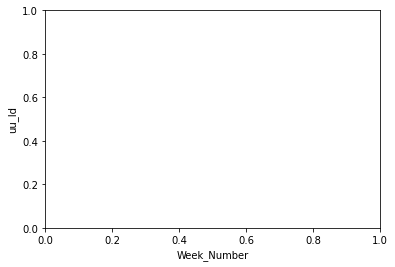

In [183]:
plt.xlabel('Week_Number') #adding the name of x-axis
plt.ylabel('uu_Id') #adding the name of y-axis
plt.show() #specifies end of graph

Build a linear model

In [184]:
def impute_logistic(g, ycol):
    g = g[[ycol, 'week_number', 'total_claims']]
    xcols = ['week_number', 'total_claims']
    ycols = [ycol]

In [185]:
mask_train = ~g[ycol].isnull()
    x_train, x_test = g.loc[mask_train, xcols], g.loc[~mask_train, xcols]
    y_train, y_test = g.loc[mask_train, ycols], g.loc[~mask_train, ycols]

IndentationError: unexpected indent (3797937319.py, line 2)

In [187]:
if y_train.shape[0] == 0:
    g[ycol] = None
return g[ycol]
    
    classes = y_train[ycol].unique()
if len(classes) == 1:
        yhat = [classes[0]]
else:
    model =
sklearn.linear_model.LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=10000).fit(x_train, y_train.values.ravel())
        yhat = model.predict(x_test)
    g.loc[~mask_train, ycols] = yhat
return g[ycol]

IndentationError: unindent does not match any outer indentation level (<tokenize>, line 12)

In [188]:
def impute_industry(g, max_week_number=37):
    g = g.loc[g.week_number <= max_week_number, :]
    x = g.copy()
    for colname in COL_MAP['industry']:
        x[colname] = impute_logistic(g, colname)
    return x

In [189]:
def load_imp_industry(csv_name='4_imp_industry.csv'):
    if not os.path.isfile(csv_name):
        d = load_clean()
        d = d.groupby('uu_id').apply(impute_industry).reset_index(0, drop=True)
        d.to_csv(csv_name, index=False)
    else:
        d = pd.read_csv(csv_name)
    return d

In [190]:
d = load_imp_industry()
d

NameError: name 'load_clean' is not defined

In [191]:
def plot_regression(d):    
    e = d.loc[:, COL_MAP['edu'] + ['total_claims']].reset_index(0, drop=True)
    e = e.fillna(0)
    X = e[COL_MAP['edu']]
    y = e['total_claims']
    model = sklearn.linear_model.LinearRegression()
    model.fit(X, y)
    fig, ax = plt.subplots()
    ax.plot(X.index, model.predict(X), label='predict')
    ax.plot(X.index, y, label='observed', ls='--')
    ax.legend()
    ax.set_xlabel('index')
    ax.set_ylabel('total_claims')

In [192]:
plot_regression(d)

NameError: name 'd' is not defined

Build a linear model

In [193]:
def impute_logistic(g, ycol):
    g = g[[ycol, 'week_number', 'total_claims']]
    xcols = ['week_number', 'total_claims']
    ycols = [ycol]

In [194]:
mask_train = ~g[ycol].isnull()
    x_train, x_test = g.loc[mask_train, xcols], g.loc[~mask_train, xcols]
    y_train, y_test = g.loc[mask_train, ycols], g.loc[~mask_train, ycols]

IndentationError: unexpected indent (3797937319.py, line 2)

In [196]:
if y_train.shape[0] == 0:
    g[ycol] = None
return g[ycol]
    
    classes = y_train[ycol].unique()
if len(classes) == 1:
        yhat = [classes[0]]
else:
    model =
sklearn.linear_model.LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=10000).fit(x_train, y_train.values.ravel())
        yhat = model.predict(x_test)
    g.loc[~mask_train, ycols] = yhat
return g[ycol]

IndentationError: unindent does not match any outer indentation level (<tokenize>, line 12)

In [197]:
def impute_industry(g, max_week_number=37):
    g = g.loc[g.week_number <= max_week_number, :]
    x = g.copy()
    for colname in COL_MAP['industry']:
        x[colname] = impute_logistic(g, colname)
    return x

In [198]:
def load_imp_industry(csv_name='4_imp_industry.csv'):
    if not os.path.isfile(csv_name):
        d = load_clean()
        d = d.groupby('uu_id').apply(impute_industry).reset_index(0, drop=True)
        d.to_csv(csv_name, index=False)
    else:
        d = pd.read_csv(csv_name)
    return d

In [199]:
d = load_imp_industry()
d

NameError: name 'load_clean' is not defined

In [200]:
def plot_regression(d):    
    e = d.loc[:, COL_MAP['edu'] + ['total_claims']].reset_index(0, drop=True)
    e = e.fillna(0)
    X = e[COL_MAP['edu']]
    y = e['total_claims']
    model = sklearn.linear_model.LinearRegression()
    model.fit(X, y)
    fig, ax = plt.subplots()
    ax.plot(X.index, model.predict(X), label='predict')
    ax.plot(X.index, y, label='observed', ls='--')
    ax.legend()
    ax.set_xlabel('index')
    ax.set_ylabel('total_claims')

In [201]:
plot_regression(d)

NameError: name 'd' is not defined